## Maximum Likelihood Lab

In this lab we will look at the DMV waiting time example from the class. Let's look at the following situation:

You want to find out how long your mom will have to wait at the DMV. In order to determine the waiting time you stayed at the DMV for a while and measured the waiting time for the customers. You were playing on your phone and so you missed to to measure the exact time. Thus you started to collect the waiting times in the form (5, 0.3), which in this example means that the waiting time was somewhere between 5-0.3 and 5+0.3 minutes. 

Now that you have your data you want to build a model. You now assume that all waiting times $W_i$ are distributed with the same **but unknown** gamma distribution with **fixed but unknown** hyperparameters $\alpha$ and $\beta$ and that all waiting times $W_i$ are independent and thus

$$P_{(\beta, \alpha)}(W_1 \in A_1, W_2 \in A_2, ..., W_N \in A_N) = \Gamma_{(\beta, \alpha)}(W_1 \in A_1)\Gamma_{(\beta, \alpha)}(W_2 \in A_2)... \Gamma_{(\beta, \alpha)}(W_N \in A_N)$$

Please take a moment and think about the 3 major assumptions:
1. The waiting times are independet.
2. All waiting times are distributed from the same type of distribution.
3. We are certain that the hyperparameters take one specific value. We just don't know which one it is. 

**Exercise 1:**

Create a lambda expression for the Gamma distribution. You will need the gamma function $\Gamma$ which is available in the scipy.special package. Plot the Gamma distribution for 4 different combinations of $\beta$ and $\alpha$ onto the same graph. Describe how the hyperparameters $\beta$ and $\alpha$ change the shape of the distribution.

In [1]:
"""
pdf is given by gamm distrib
looking for the best alpha beta combination
"""

'\npdf is given by gamm distrib\nlooking for the best alpha beta combination\n\n \n\n'

[(1, 3), (1, 0.5), (3, 1), (5, 1)]


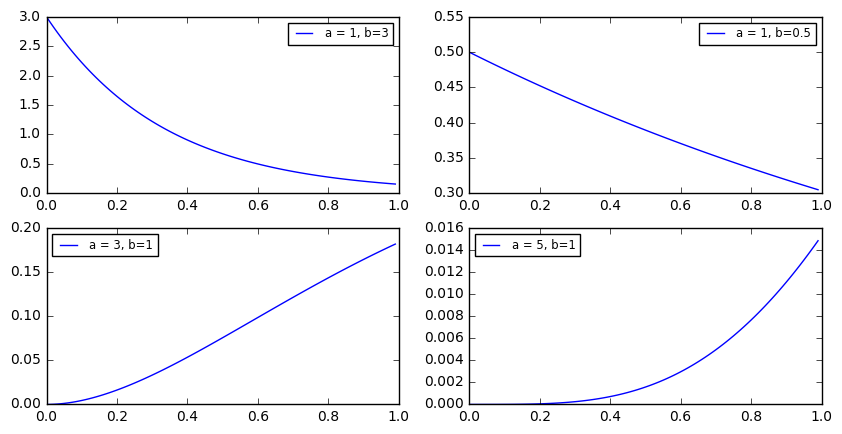

In [5]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.special import binom as binomial
from scipy.special import gamma
%matplotlib inline

gammass = lambda a, b: lambda x: ((b**a)/gamma(a)) * (x **(a-1)) * (np.exp(-b*x))
X = np.arange(0,1,0.01)
a = [1,1, 3,5]
b = [3,.5,1,1]


ziped = zip(a,b)

fig, ax = plt.subplots(2,2,figsize=(10,5))
ax = ax.reshape(4,)
ziped2 = zip(ax,ziped)

print ziped
for e in ziped2:
    e[0].plot(X,gammass(*e[1])(X), label = 'a = {0}, b={1}'.format(*e[1]))
    e[0].legend(loc = 'best', fontsize = 'small')
    



**Exercise 2:**

The data points that you collected are in the below list denoted by waiting_time. Each of the tuples in the list represents an intervall of time that you measured. You can now use the below data points to calculate the probability of the measured intervalls as a function of $(\beta, \alpha)$

$$(\beta, \alpha) \to P_{(\beta, \alpha)}( W_1 \in [3.8,4.2), W_2 \in [3.5, 4.5), W_3 \in [4.1, 5.9), ...)$$

Create a lambda expression that maps every pair $(\beta, \alpha)$ onto the probability and craete a 3D plot. You will need to use numpy.vectorize to vectorize the lambda expression. Numpy converts the lambda expression so that it can take numpy arrays as arguments. Look into last weeks notes to find out how to plot a 3D plot.

In [9]:
waiting_time =[(4,0.2),(4,0.5), (5,0.9), (6,0.2), (4,0.2), (6,0.2), (5,0.6), (15,0.6)]
alpha_beta = [(x-y, x+y) for x,y in waiting_time]
alpha_beta



[(3.8, 4.2),
 (3.5, 4.5),
 (4.1, 5.9),
 (5.8, 6.2),
 (3.8, 4.2),
 (5.8, 6.2),
 (4.4, 5.6),
 (14.4, 15.6)]

**Gamma Distribution**

The Gamma distribution is defined by
$$d\Gamma_{(\beta, \alpha)}(x) = \frac{\beta^{\alpha}}{\Gamma(\alpha)} x^{\alpha -1} e^{-\beta x}d\lambda_L(x) ,\, \beta >0, \alpha >0$$

A random Variable which is distributed with the Gamma Distribution only takes positive values. This distribution is often used to model waiting times such as how long do I have to wait at the DMV.


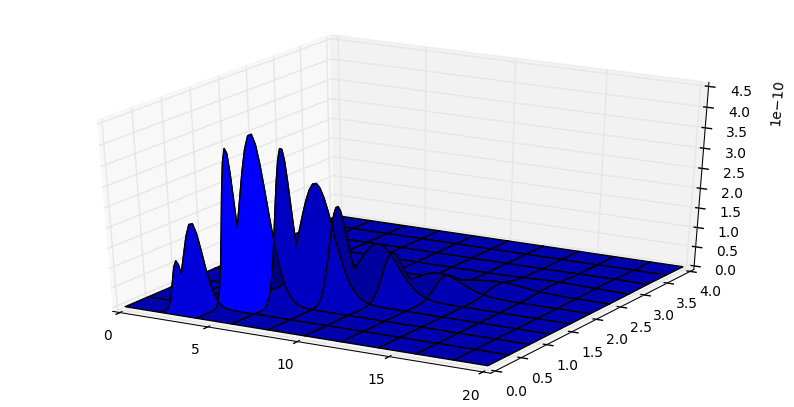

In [10]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.special import binom as binomial
from scipy.special import gamma
from scipy import integrate
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline



gammad = lambda a, b: lambda x: ((b**a)/gamma(a)) * (x **(a-1)) * (np.exp(-b*x))

from mpl_toolkits.mplot3d import Axes3D

prod_prob = (lambda a,b: 
              integrate.quad(lambda x: gammad(a,b)(x), 3.8, 4.2)[0]
            * integrate.quad(lambda x: gammad(a,b)(x), 3.5, 4.5)[0] 
            * integrate.quad(lambda x: gammad(a,b)(x), 4.1, 5.9)[0]
            * integrate.quad(lambda x: gammad(a,b)(x), 5.8, 6.2)[0]
            * integrate.quad(lambda x: gammad(a,b)(x), 3.8, 4.2)[0]
            * integrate.quad(lambda x: gammad(a,b)(x), 5.8, 6.2)[0]
            * integrate.quad(lambda x: gammad(a,b)(x), 4.4, 5.6)[0]
            * integrate.quad(lambda x: gammad(a,b)(x), 14.4, 15.6)[0])



#a = np.linspace(0.01,20, 100)

a = np.linspace(0.01,20, 100)
b = np.linspace(0.01,4, 100)
a, b = np.meshgrid(a,b)
vector = np.vectorize(prod_prob)
fig = plt.figure(figsize=(10,5))
ax1 = fig.add_subplot(1,1,1, projection = '3d')
ax1.plot_surface(a,b, vector(a,b))



**Exercise 3:**

Each of the points $(\beta, \alpha)$ represents a model that we could pick and the plot shows us how likely the measured waiting times are if we would have fixed $(\beta, \alpha)$ at the respective values. We now have to make a decision which pair $(\beta, \alpha)$ we want to pick. One way to approach this decision problem is to pick the $(\beta, \alpha)$ pair which produces the highest probability for the measured event. This approach is called **Maximum Likelihood**. 

Use the minimize function in the scipy.optimize package to find the maximum likelihood. You will have to change the function so that the maximum becomes the minimum. Additionally, minimize only takes functions of one variable. You will have to change your function so that it takes a list as an argument and not two numbers. minimize looks for a minimum around an initial point x0. You will have to provide such a point. Use method = 'Nelder-Mead'. 

See below for an example of how to use minimize.

[(0.01, 0.01)]


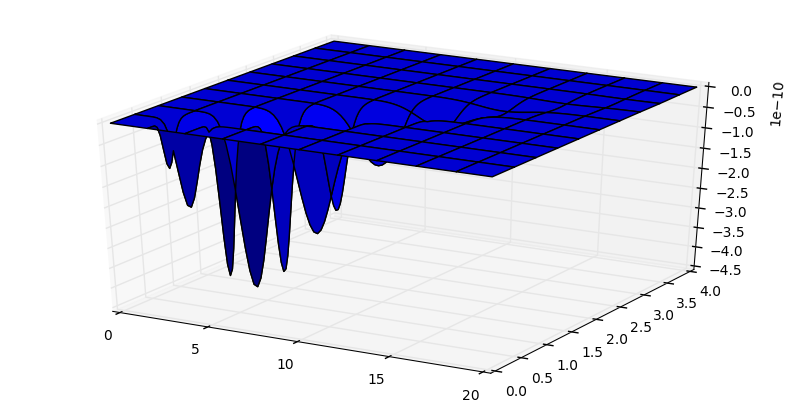

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.special import binom as binomial
from scipy.special import gamma
from scipy import integrate
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline



gammad = lambda a, b: lambda x: ((b**a)/gamma(a)) * (x **(a-1)) * (np.exp(-b*x))

from mpl_toolkits.mplot3d import Axes3D

prod_prob = (lambda a,b: 
              integrate.quad(lambda x: gammad(a,b)(x), 3.8, 4.2)[0]
            * integrate.quad(lambda x: gammad(a,b)(x), 3.5, 4.5)[0] 
            * integrate.quad(lambda x: gammad(a,b)(x), 4.1, 5.9)[0]
            * integrate.quad(lambda x: gammad(a,b)(x), 5.8, 6.2)[0]
            * integrate.quad(lambda x: gammad(a,b)(x), 3.8, 4.2)[0]
            * integrate.quad(lambda x: gammad(a,b)(x), 5.8, 6.2)[0]
            * integrate.quad(lambda x: gammad(a,b)(x), 4.4, 5.6)[0]
            * integrate.quad(lambda x: gammad(a,b)(x), 14.4, 15.6)[0]
            * -1)



a = np.linspace(0.01,20, 100)
b = np.linspace(0.01,4, 100)

zipped = zip(a,b)
print zipped[0:1]
a,b = np.meshgrid(a,b)
vector = np.vectorize(prod_prob)
fig = plt.figure(figsize=(10,5))
ax1 = fig.add_subplot(1,1,1, projection = '3d')
ax1.plot_surface(a,b, vector(a,b))



In [12]:
from scipy.optimize import minimize

func = lambda z: prod_prob(z[0], z[1])

x0 = [5,1]
funxMin = minimize(func, x0, method = 'Nelder-Mead')
funxMin.x

array([ 4.95830573,  0.81042338])

**Exercise 4:**

Now that we have our maximum likelihood solution we can take a step back and think about what we just did. 

* Take a look at the plot and remind yourself that minimize looks for a solution around an initial point x0. What's the problem with that?
* We assumed that the outcome that we measured is the outcome with the hightest probability. Take a look at the actual probability of getting what we measured under the assumption of the model. How likely was it? 
* Take a moment and check out what outliers are. How do those data points effect the solution in light of the above point and why?
* Can you think of a way to make a better decision?

In [ ]:
"""
1. The problem with the minimize solution is that it so heavily depends on your intial guess. 
If your initial guess is not within the funnel, it will pick a relative minimum, not necessarily the absolute
minimum. 

2. The probabilities are extremely small, close to zero,
which means that the probability of our dataset happening is very small.

3. An outlier is a data point which is extremely larger or smaller from the next data point.
In our set, the outlier is the 8th weighting time, (14.4, 15.6) and such a far deviation from the rest of 
the data points will skew the moments.

4. We can take in more data points. If we take in data points, then the weight of each of the data points decreases.
And we can assume that more data points will bring the distribution closer to the real distribution.


"""



**Exercise 5:**

Plot the distribution of the maximum likelihood solution together with a normed histogram of the waiting times. What can you observe and how does this relate to Exercise 4?

'\nshows that outlier has too much weight bc the sample size is too small\n\n'

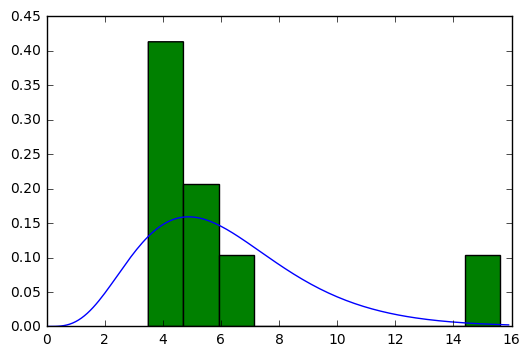

In [2]:
gammad = lambda x: ((0.81042338**4.95830573)/gamma(4.95830573)) * (x **(4.95830573-1)) * (np.exp(-0.81042338*x))
x = np.arange(0,16,.1)
plt.plot(x, gammad(x))

wt = [3.8, 4.2,3.5, 4.5, 4.1, 5.9,5.8, 6.2,3.8, 4.2,5.8, 6.2,4.4, 5.6,14.4, 15.6]

#numpy.histogram(a, bins=10, range=None, normed=False, weights=None, density=None)[source]

plt.hist(wt, normed=True)


"""
Shows that outlier has too much weight bc the sample size is too small.

"""


**Exercise 6:**

Calculate the Mean and the Variance of the maximum likelihood distribution using integration. Remember: The Mean of the distribution $E[W]$ is the expected waiting time and the square root of the variance $\sqrt{Var[W]}$ is the expected range of waiting times.

In [7]:
from scipy import integrate

gammad = lambda x: ((0.81042338**4.95830573)/gamma(4.95830573)) * (x **(4.95830573-1)) * (np.exp(-0.81042338*x))

#mean was calculated by integral
evwt = integrate.quad(lambda x: gammad(x) * x, 0, np.infty)
print evwt[0]

evwt2 = integrate.quad(lambda x: gammad(x) * (x**2), 0, np.infty)
varwt = evwt2[0] - evwt[0]**2
print varwt

#definition in terms of gamma distributions
gamma_mean =4.95830573/0.81042338
print "this is the mean- " + str(gamma_mean)

gamma_var =4.95830573/(0.81042338**2)
print "this is the mean- " + str(gamma_var)

#shows that integral will give same mean as mean and variance according to gamma distribution formula.




6.11816718565
7.54934684344
this is the mean- 6.11816718565
this is the mean- 7.54934684344


**Exercise 7:**

Use the minimize function to calculate the waiting time with the hightest probability and its respective probability. Compare your result to the result of Exercise 6. Does this make you think about a better decision methedology for $(\beta, \alpha)$?

The waiting time with the highest probability is [ 4.88427734]


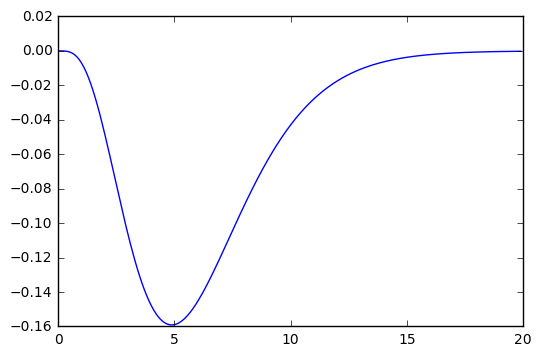

In [16]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.special import binom as binomial
from scipy.special import gamma
%matplotlib inline
from scipy.optimize import minimize


gammad = lambda x: ((0.81042338**4.95830573)/gamma(4.95830573)) * (x **(4.95830573-1)) * (np.exp(-0.81042338*x) * (-1))
x = np.arange(0,20,.1)
plt.plot(x, gammad(x))

func12 = lambda z: gammad(z)
x0 = [4]
funxMin = minimize(func12, x0, method = 'Nelder-Mead')
print "The waiting time with the highest probability is " + str(funxMin.x)




# gammad = ((0.81042338**4.95830573)/gamma(4.95830573)) * (4.88427734 **(4.95830573-1)) * \
(np.exp(-0.81042338*4.88427734))

print "Probability of getting waiting time 4.88427734 is with a probability of " + str(gammad) + "%"

